<a href="https://colab.research.google.com/github/nibbe99/AI-model-clothes-predictions/blob/main/Multi_class_classification_Predicting_clothings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


plot a random image

Text(0.5, 1.0, 'T-shirt/top')

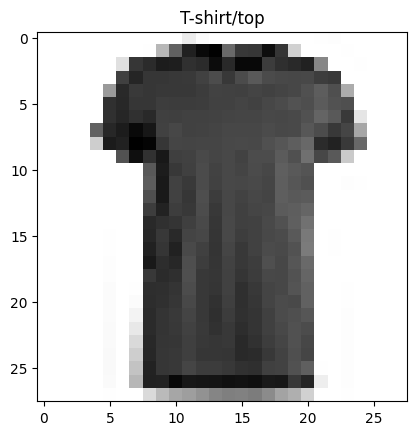

In [4]:
#
plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.title(class_names[y_train[17]])

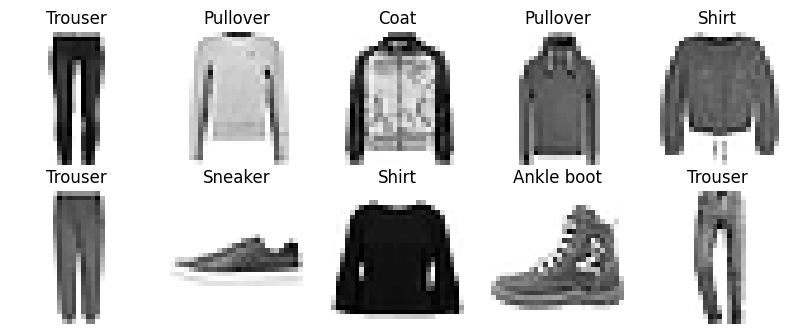

In [5]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

#Building multi-class classification model

*   Input shape = 28 x 26  (x_train[0].shape)
*   Output shape = 10 len(class_names)
*   Loss function = tf.keras.losses.CategoricalCrossentropy()
*   Output layer activation = Softmax (NOT SIGMOID)
*   y_train = onehotEncoded => CategoricalCrossentropy ELSE SparseCategoricalCrossentropy

NameError: name 'model1' is not defined

#Normalized data is between 0 and 1

KEY!!!

In [7]:
# data is too big, normalize it with noramilsation
x_train.min(), x_train.max()  # is from 0 - 255

(0, 255)

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
x_train.min(), x_train.max(), x_train.shape

(0.0, 1.0, (60000, 28, 28))

In [10]:
#model2

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics= ["accuracy"])

history = model2.fit(x_train, y_train, epochs = 15, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7657 - loss: 0.6634 - val_accuracy: 0.8485 - val_loss: 0.4197
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8621 - loss: 0.3836 - val_accuracy: 0.8560 - val_loss: 0.3867
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8755 - loss: 0.3412 - val_accuracy: 0.8625 - val_loss: 0.3732
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8834 - loss: 0.3152 - val_accuracy: 0.8684 - val_loss: 0.3539
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8900 - loss: 0.2975 - val_accuracy: 0.8693 - val_loss: 0.3563
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8942 - loss: 0.2816 - val_accuracy: 0.8748 - val_loss: 0.3566
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8984 - loss: 0.2699 - val_accuracy: 0.8694 - val_loss: 0.3605
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9029 - loss: 0.2596 

In [11]:
y_predict2 = model2.predict(x_test)
np.argmax(y_predict2[4]), y_test[0:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(6, array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

<Axes: >

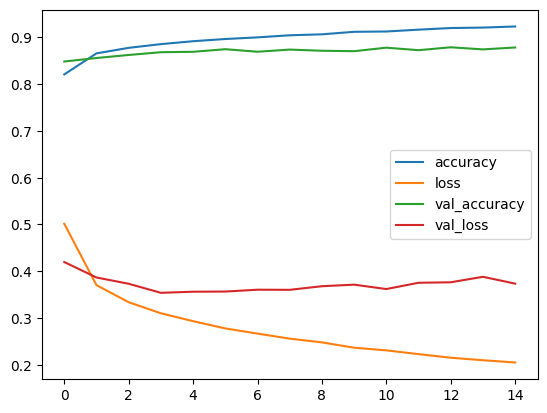

In [12]:
pd.DataFrame(history.history).plot()

#Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

y_preds = model2.predict(x_test)
y_preds = np.argmax(y_preds, axis = 1)

y_preds[0:10]

confusion_matrix(y_test, y_preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[791,   3,  15,  24,   6,   2, 153,   0,   6,   0],
       [  3, 972,   0,  17,   3,   1,   2,   0,   2,   0],
       [ 16,   0, 818,   8,  85,   0,  73,   0,   0,   0],
       [ 22,   9,  12, 858,  57,   0,  37,   0,   5,   0],
       [  1,   1, 115,  14, 825,   0,  42,   0,   2,   0],
       [  0,   0,   0,   1,   0, 938,   0,  36,   1,  24],
       [ 90,   1,  83,  25,  88,   1, 701,   0,  10,   1],
       [  0,   0,   0,   0,   0,   7,   0, 967,   0,  26],
       [  5,   0,   3,   4,   9,   3,   8,   5, 963,   0],
       [  0,   0,   0,   0,   0,   7,   1,  40,   0, 952]])

In [15]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8776 - loss: 0.3644


[0.37350377440452576, 0.8784999847412109]

In [14]:
import itertools

def createConfusionMatrix(y_true, y_preds, classes=None, figsize=(10,10), text_size = 15):

#Create the foncusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]
  #Make it prettier
  fig, ax = plt.subplots(figsize=figsize)
  #Crate a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

#Labels the axes
  ax.set(title = "Confusion Matrix",
       xlabel = "Predicted",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

#Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

# Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

#plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment="center",
           color = "white" if cm[i, j] > threshold else "black",
           size = text_size)

#Results

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [20]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [32]:
def plot_prediction_images():
  num_rows = 10
  num_cols = 3
  num_images = num_rows * num_cols
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i, y_predict2[i], y_test, x_test)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i, y_predict2[i],  y_test)
  plt.tight_layout()
  plt.show

#Summary report

Confusion matrix:


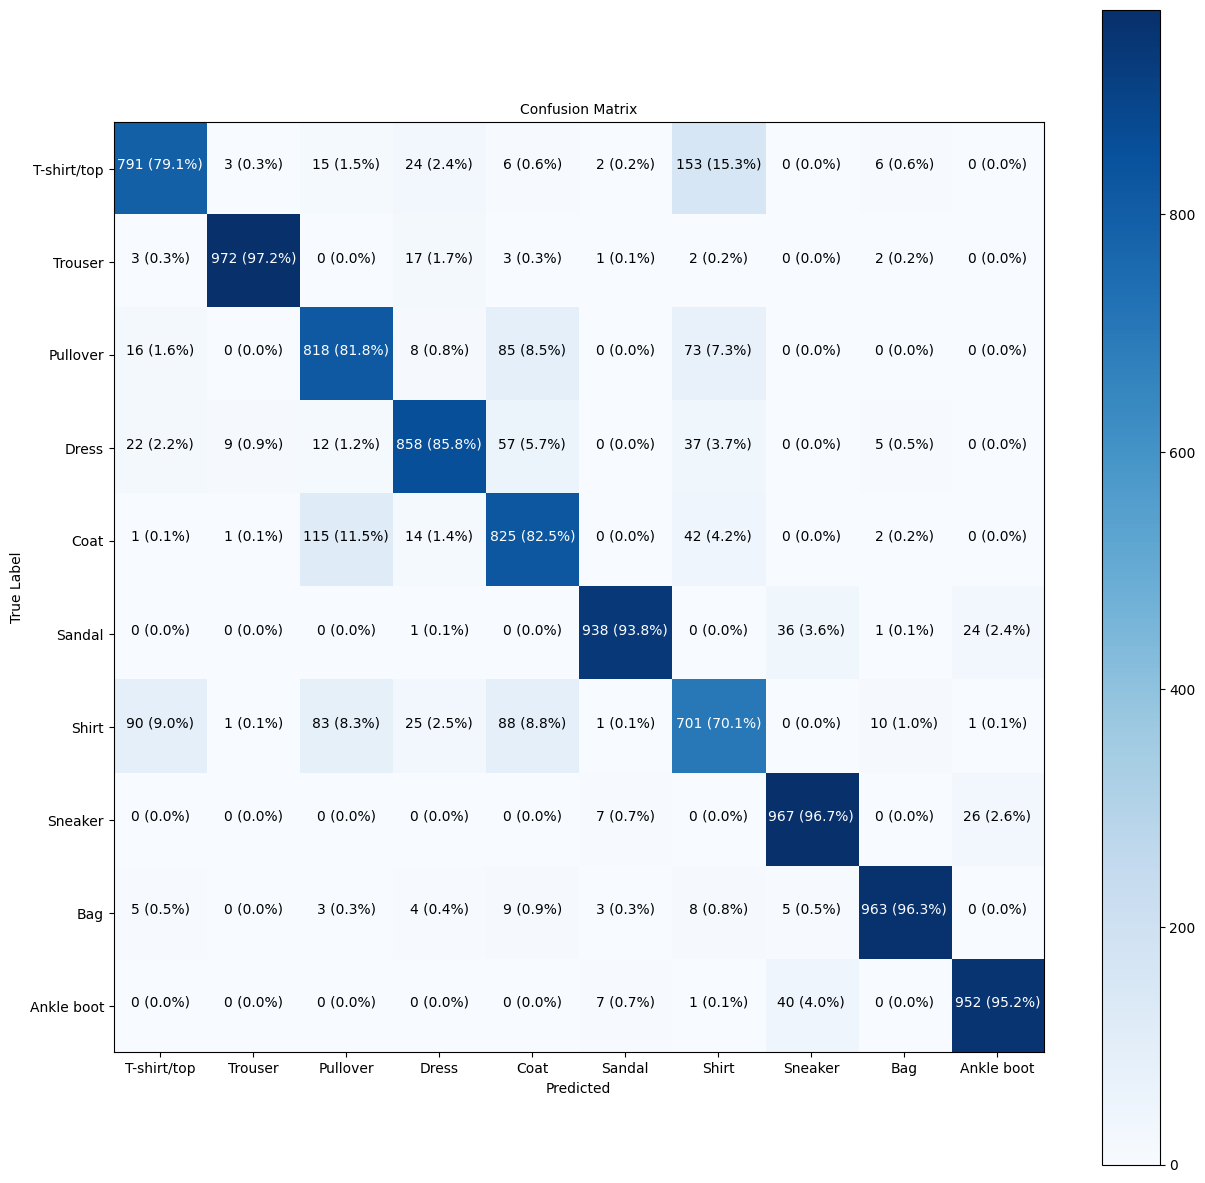

In [21]:
createConfusionMatrix(y_true = y_test,
                      y_preds = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)


In [34]:
loss, accuracy = model2.evaluate(x_test, y_test)
print("accuracy  {:.2f}%".format(accuracy))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8776 - loss: 0.3644
accuracy  0.88%


In [23]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,182 (985.09 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,122 (656.73 KB)

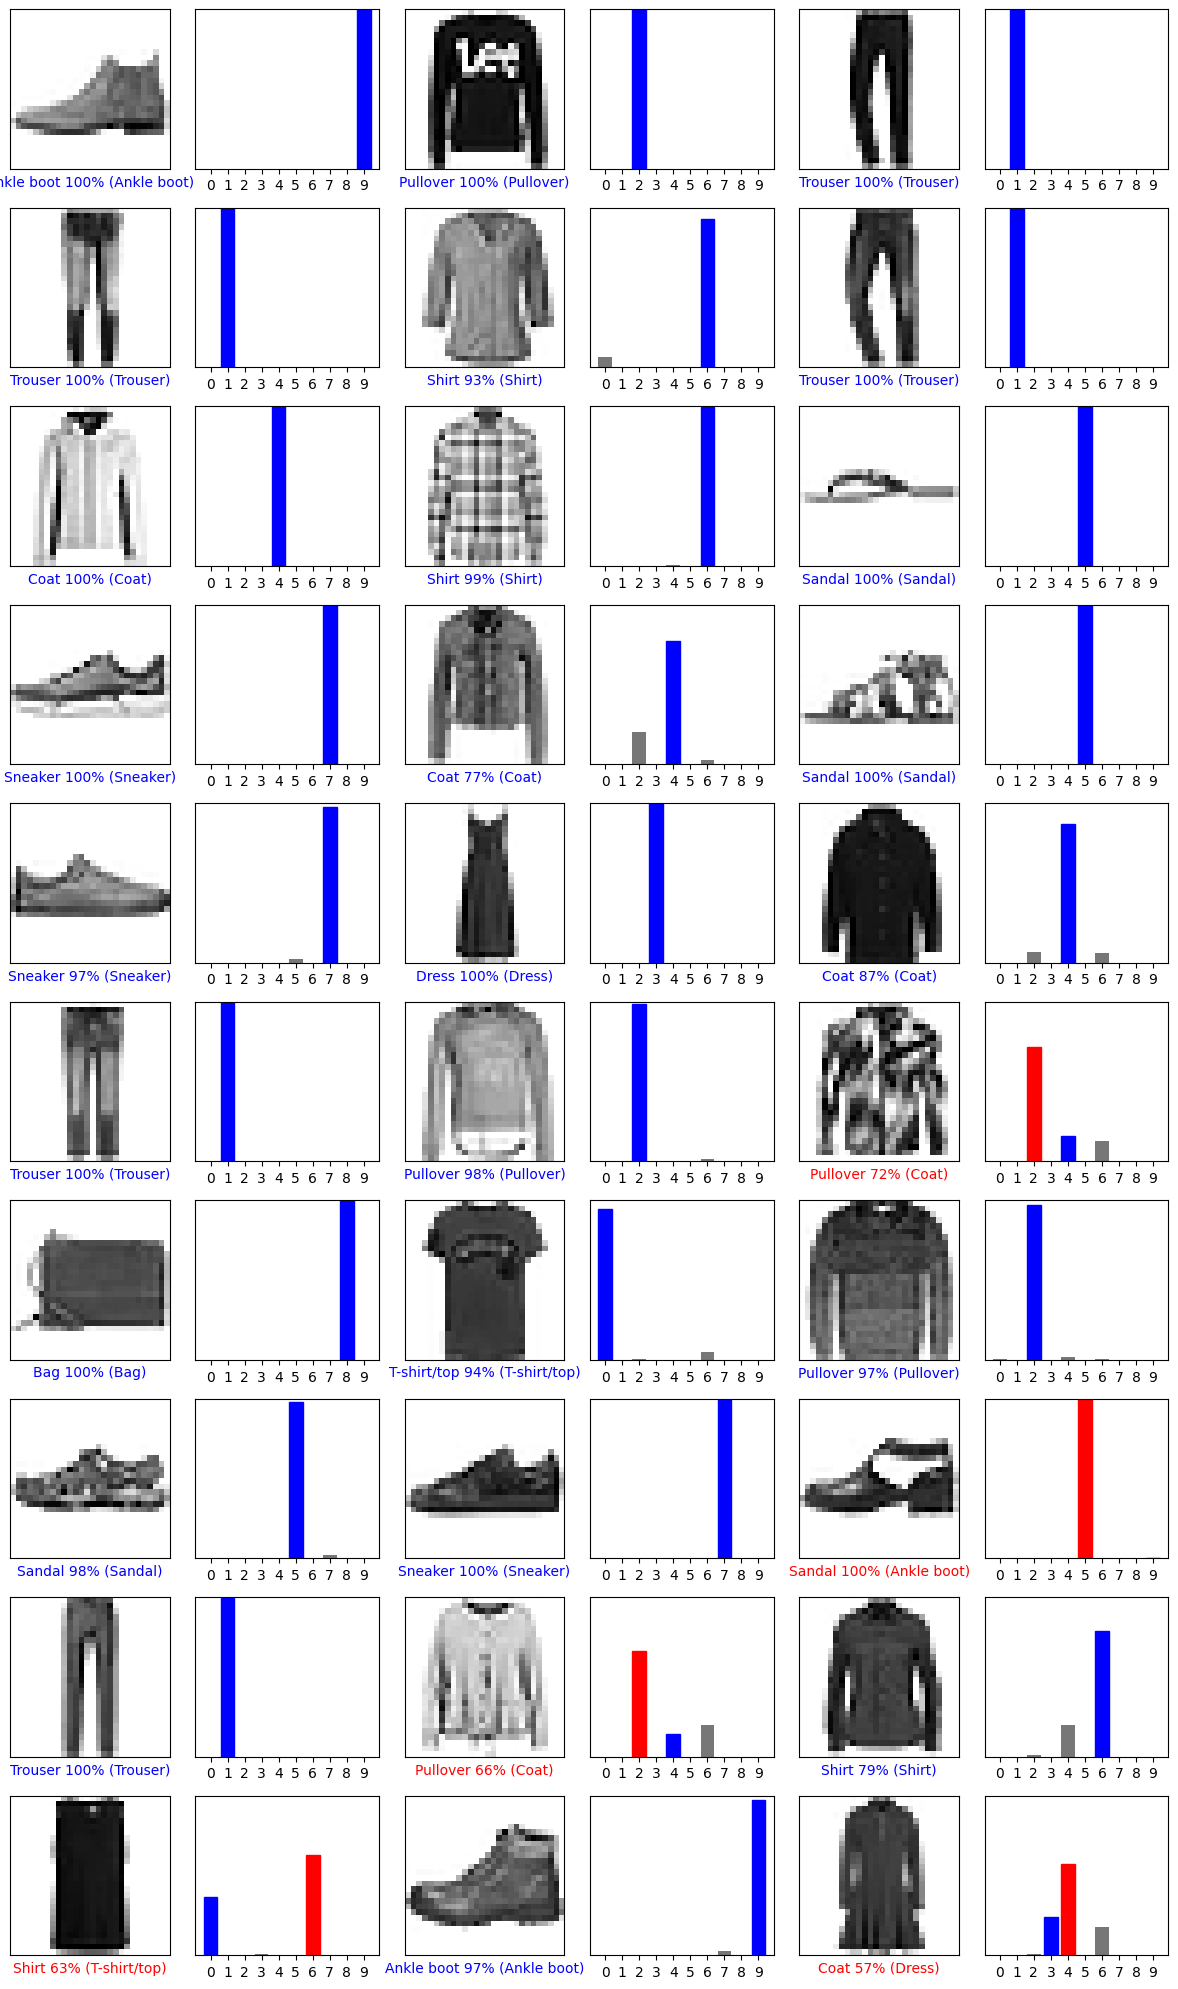

In [35]:
plot_prediction_images()